# RedCarpetUp Task

## Data Selection

In [137]:
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline

**NOTE : To use nsepy, please install the nsepy package onto your PC. i.e $ pip install nsepy**

In [138]:
#from nsepy import get_history
#infy = get_history(symbol='MCX',start=date(2015,1,1),end = date(2015,12,31))
#tcs = get_history(symbol='TCS',start=date(2015,1,1),end = date(2015,12,31))
#nifty_IT = get_history(symbol='NIFTY IT',start=date(2015,1,1),end = date(2015,12,31),index = True)

**NOTE** : <br>
The above commented code requires an internet connection to load the csv data. The csv data has already been downloaded by me and implemented using the code below.

In [139]:
infy = pd.read_csv('infy_stock.csv', parse_dates=['Date'])
tcs = pd.read_csv('tcs_stock.csv', parse_dates=['Date'])
nifty_IT = pd.read_csv('nifty_it_index.csv', parse_dates=['Date'])

In [140]:
infy.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
1,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
3,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
4,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


The INFY stock prices data has been loaded into the variable 'infy'

In [141]:
tcs.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883
1,2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2,2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207
3,2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894
4,2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724


NIFT IT indexes are loaded into the variable nifty_IT

In [142]:
nifty_IT.head()

,Date,Open,High,Low,Close,Volume,Turnover
0,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09
1,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09
2,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10
3,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10
4,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10


TCS stocks data loaded into the variable tcs

## Part 1: Time Series Analysis

### Rolling averages

In [143]:
type(infy.index),type(tcs.index),type(nifty_IT.index)

(pandas.core.indexes.range.RangeIndex,
 pandas.core.indexes.range.RangeIndex,
 pandas.core.indexes.range.RangeIndex)

The dataframes are not Datetime Indexed. Therefore we need to DateTime Index the dataframes

In [144]:
infy.index = pd.to_datetime(infy.index)
tcs.index = pd.to_datetime(tcs.index)
nifty_IT.index = pd.to_datetime(nifty_IT.index)

type(infy.index),type(tcs.index),type(nifty_IT.index)

(pandas.core.indexes.datetimes.DatetimeIndex,
 pandas.core.indexes.datetimes.DatetimeIndex,
 pandas.core.indexes.datetimes.DatetimeIndex)

In [145]:
from datetime import timedelta
def rollingAvg(df):
    window = np.arange(4,53,12)
    series = df.Close
    df_new = pd.DataFrame(index=df.index,columns=list(window))
    for i in window:
        df_new[i] = series.rolling(window=timedelta(weeks=int(i))).mean()
    df_new.columns.name = 'Rolling window size'
    return df_new

**In the function above, I create a k-moving average function where k = 4,16,...52. I put all these individual moving averages Series into a single Dataframe**

In [146]:
tcs_df = rollingAvg(tcs)
tcs_df.head()

Rolling window size,4,16,28,40,52
1970-01-01 00:00:00.000000000,2545.550000,2545.550000,2545.550000,2545.550000,2545.550000
1970-01-01 00:00:00.000000001,2562.500000,2562.500000,2562.500000,2562.500000,2562.500000
1970-01-01 00:00:00.000000002,2555.083333,2555.083333,2555.083333,2555.083333,2555.083333
1970-01-01 00:00:00.000000003,2527.962500,2527.962500,2527.962500,2527.962500,2527.962500
1970-01-01 00:00:00.000000004,2505.910000,2505.910000,2505.910000,2505.910000,2505.910000


In [147]:
infy_df = rollingAvg(infy)
infy_df.head()

Rolling window size,4,16,28,40,52
1970-01-01 00:00:00.000000000,1974.400,1974.400,1974.400,1974.400,1974.400
1970-01-01 00:00:00.000000001,1993.800,1993.800,1993.800,1993.800,1993.800
1970-01-01 00:00:00.000000002,1994.500,1994.500,1994.500,1994.500,1994.500
1970-01-01 00:00:00.000000003,1984.425,1984.425,1984.425,1984.425,1984.425
1970-01-01 00:00:00.000000004,1980.250,1980.250,1980.250,1980.250,1980.250


In [148]:
nifty_df = rollingAvg(nifty_IT)
nifty_df.head()

Rolling window size,4,16,28,40,52
1970-01-01 00:00:00.000000000,11215.700000,11215.700000,11215.700000,11215.700000,11215.700000
1970-01-01 00:00:00.000000001,11293.900000,11293.900000,11293.900000,11293.900000,11293.900000
1970-01-01 00:00:00.000000002,11278.783333,11278.783333,11278.783333,11278.783333,11278.783333
1970-01-01 00:00:00.000000003,11199.062500,11199.062500,11199.062500,11199.062500,11199.062500
1970-01-01 00:00:00.000000004,11142.450000,11142.450000,11142.450000,11142.450000,11142.450000


### Additional: Plotting the different k-moving averages (k=4,16,...52) for comparision

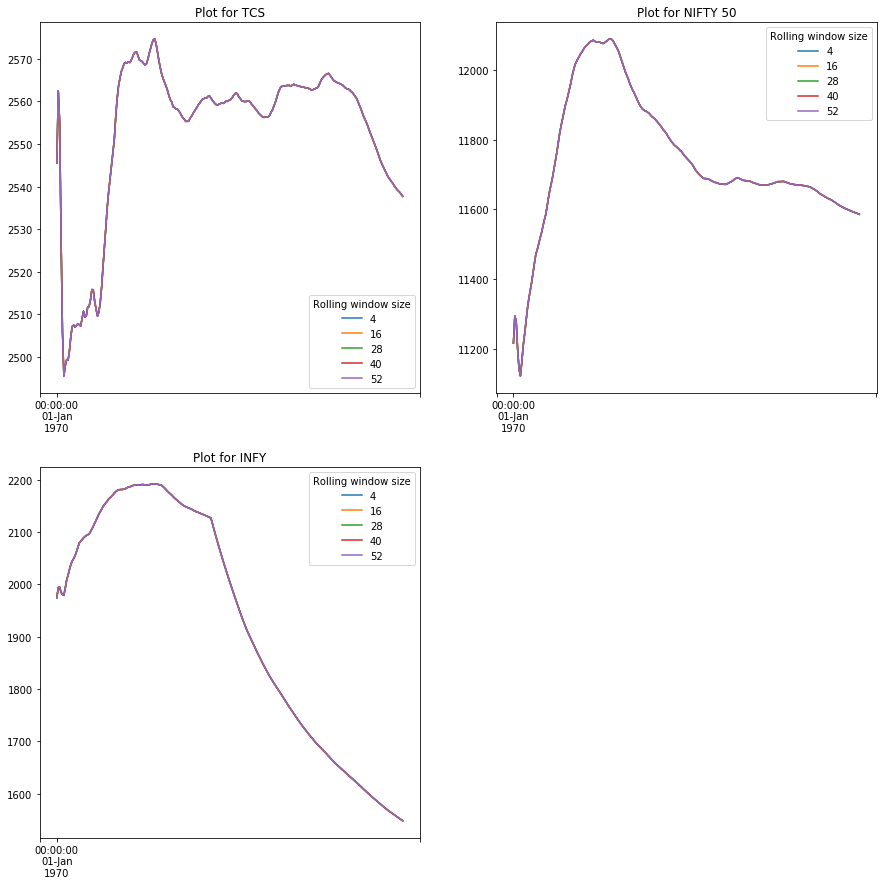

In [149]:
fig = plt.figure(figsize=(15,15))
df_list = [tcs_df,nifty_df,infy_df]
plot_titles = ['Plot for TCS','Plot for NIFTY 50','Plot for INFY']
for i in range(3):
    ax = fig.add_subplot(2,2,i+1)
    df_list[i].plot(ax=ax,title=plot_titles[i])

### Conclusion: We observe that as the window size of the moving average increases, the time-series plot gets more and more noise-free

## Calculating Shocks

### 1. Volume shock

In [150]:
def volumeShock(df):
    volume_arr = np.array(df.Volume)
    volume_prev = np.roll(volume_arr,1) #Shift the array by 1 position ahead
    volume_prev[0] = 0 #The first element is nullified
    
    volume_diff = volume_arr - volume_prev
    
    volume_shock_np = ((volume_diff/volume_arr)>0.1).astype(int)
    
    volume_shock = pd.Series(volume_shock_np,index=df.index)
    return volume_shock

In the function volumeShock above, I have done the computaion in numpy than in Series as the computations in numpy are faster.

In [151]:
volumeShock(infy)

1970-01-01 00:00:00.000000000    1
1970-01-01 00:00:00.000000001    1
1970-01-01 00:00:00.000000002    1
1970-01-01 00:00:00.000000003    0
1970-01-01 00:00:00.000000004    0
1970-01-01 00:00:00.000000005    1
1970-01-01 00:00:00.000000006    1
1970-01-01 00:00:00.000000007    0
1970-01-01 00:00:00.000000008    0
1970-01-01 00:00:00.000000009    1
1970-01-01 00:00:00.000000010    0
1970-01-01 00:00:00.000000011    0
1970-01-01 00:00:00.000000012    0
1970-01-01 00:00:00.000000013    1
1970-01-01 00:00:00.000000014    1
1970-01-01 00:00:00.000000015    1
1970-01-01 00:00:00.000000016    0
1970-01-01 00:00:00.000000017    1
1970-01-01 00:00:00.000000018    0
1970-01-01 00:00:00.000000019    1
1970-01-01 00:00:00.000000020    0
1970-01-01 00:00:00.000000021    0
1970-01-01 00:00:00.000000022    0
1970-01-01 00:00:00.000000023    0
1970-01-01 00:00:00.000000024    1
1970-01-01 00:00:00.000000025    0
1970-01-01 00:00:00.000000026    0
1970-01-01 00:00:00.000000027    1
1970-01-01 00:00:00.

In [152]:
volumeShock(tcs)

1970-01-01 00:00:00.000000000    1
1970-01-01 00:00:00.000000001    1
1970-01-01 00:00:00.000000002    1
1970-01-01 00:00:00.000000003    1
1970-01-01 00:00:00.000000004    0
1970-01-01 00:00:00.000000005    0
1970-01-01 00:00:00.000000006    1
1970-01-01 00:00:00.000000007    0
1970-01-01 00:00:00.000000008    0
1970-01-01 00:00:00.000000009    1
1970-01-01 00:00:00.000000010    1
1970-01-01 00:00:00.000000011    0
1970-01-01 00:00:00.000000012    0
1970-01-01 00:00:00.000000013    1
1970-01-01 00:00:00.000000014    1
1970-01-01 00:00:00.000000015    0
1970-01-01 00:00:00.000000016    1
1970-01-01 00:00:00.000000017    0
1970-01-01 00:00:00.000000018    1
1970-01-01 00:00:00.000000019    1
1970-01-01 00:00:00.000000020    1
1970-01-01 00:00:00.000000021    0
1970-01-01 00:00:00.000000022    0
1970-01-01 00:00:00.000000023    0
1970-01-01 00:00:00.000000024    1
1970-01-01 00:00:00.000000025    0
1970-01-01 00:00:00.000000026    0
1970-01-01 00:00:00.000000027    1
1970-01-01 00:00:00.

In [153]:
volumeShock(nifty_IT)

1970-01-01 00:00:00.000000000    1
1970-01-01 00:00:00.000000001    1
1970-01-01 00:00:00.000000002    0
1970-01-01 00:00:00.000000003    1
1970-01-01 00:00:00.000000004    0
1970-01-01 00:00:00.000000005    1
1970-01-01 00:00:00.000000006    1
1970-01-01 00:00:00.000000007    0
1970-01-01 00:00:00.000000008    0
1970-01-01 00:00:00.000000009    0
1970-01-01 00:00:00.000000010    0
1970-01-01 00:00:00.000000011    0
1970-01-01 00:00:00.000000012    0
1970-01-01 00:00:00.000000013    0
1970-01-01 00:00:00.000000014    1
1970-01-01 00:00:00.000000015    0
1970-01-01 00:00:00.000000016    1
1970-01-01 00:00:00.000000017    0
1970-01-01 00:00:00.000000018    0
1970-01-01 00:00:00.000000019    0
1970-01-01 00:00:00.000000020    1
1970-01-01 00:00:00.000000021    0
1970-01-01 00:00:00.000000022    1
1970-01-01 00:00:00.000000023    0
1970-01-01 00:00:00.000000024    0
1970-01-01 00:00:00.000000025    0
1970-01-01 00:00:00.000000026    0
1970-01-01 00:00:00.000000027    1
1970-01-01 00:00:00.

### 2. Price Shocks / Price Black Swan

In [154]:
def pricingShock(df):
    pricing_arr = np.array(df.Close)
    pricing_next = np.roll(pricing_arr,-1) #Shift the array by 1 position behind
    pricing_next[-1] = 0 #The last element is nullified
    
    pricing_diff = pricing_next - pricing_arr
    
    pricing_shock_np = ((pricing_diff/pricing_arr)>0.02).astype(int)
    
    pricing_shock = pd.Series(pricing_shock_np,index=df.index)
    return pricing_shock

**Pricing Shock : Based on the difference of (T+1)th closing price and (T)th closing price**

In [155]:
pricingShock(infy)

1970-01-01 00:00:00.000000000    0
1970-01-01 00:00:00.000000001    0
1970-01-01 00:00:00.000000002    0
1970-01-01 00:00:00.000000003    0
1970-01-01 00:00:00.000000004    0
1970-01-01 00:00:00.000000005    1
1970-01-01 00:00:00.000000006    1
1970-01-01 00:00:00.000000007    0
1970-01-01 00:00:00.000000008    0
1970-01-01 00:00:00.000000009    0
1970-01-01 00:00:00.000000010    0
1970-01-01 00:00:00.000000011    0
1970-01-01 00:00:00.000000012    0
1970-01-01 00:00:00.000000013    1
1970-01-01 00:00:00.000000014    0
1970-01-01 00:00:00.000000015    0
1970-01-01 00:00:00.000000016    0
1970-01-01 00:00:00.000000017    0
1970-01-01 00:00:00.000000018    0
1970-01-01 00:00:00.000000019    0
1970-01-01 00:00:00.000000020    0
1970-01-01 00:00:00.000000021    0
1970-01-01 00:00:00.000000022    0
1970-01-01 00:00:00.000000023    1
1970-01-01 00:00:00.000000024    0
1970-01-01 00:00:00.000000025    0
1970-01-01 00:00:00.000000026    0
1970-01-01 00:00:00.000000027    0
1970-01-01 00:00:00.

In [156]:
pricingShock(tcs)

1970-01-01 00:00:00.000000000    0
1970-01-01 00:00:00.000000001    0
1970-01-01 00:00:00.000000002    0
1970-01-01 00:00:00.000000003    0
1970-01-01 00:00:00.000000004    0
1970-01-01 00:00:00.000000005    1
1970-01-01 00:00:00.000000006    0
1970-01-01 00:00:00.000000007    0
1970-01-01 00:00:00.000000008    0
1970-01-01 00:00:00.000000009    0
1970-01-01 00:00:00.000000010    0
1970-01-01 00:00:00.000000011    0
1970-01-01 00:00:00.000000012    0
1970-01-01 00:00:00.000000013    0
1970-01-01 00:00:00.000000014    0
1970-01-01 00:00:00.000000015    0
1970-01-01 00:00:00.000000016    0
1970-01-01 00:00:00.000000017    0
1970-01-01 00:00:00.000000018    0
1970-01-01 00:00:00.000000019    0
1970-01-01 00:00:00.000000020    0
1970-01-01 00:00:00.000000021    0
1970-01-01 00:00:00.000000022    0
1970-01-01 00:00:00.000000023    0
1970-01-01 00:00:00.000000024    0
1970-01-01 00:00:00.000000025    0
1970-01-01 00:00:00.000000026    0
1970-01-01 00:00:00.000000027    0
1970-01-01 00:00:00.

In [157]:
pricingShock(nifty_IT)

1970-01-01 00:00:00.000000000    0
1970-01-01 00:00:00.000000001    0
1970-01-01 00:00:00.000000002    0
1970-01-01 00:00:00.000000003    0
1970-01-01 00:00:00.000000004    0
1970-01-01 00:00:00.000000005    1
1970-01-01 00:00:00.000000006    0
1970-01-01 00:00:00.000000007    0
1970-01-01 00:00:00.000000008    0
1970-01-01 00:00:00.000000009    0
1970-01-01 00:00:00.000000010    0
1970-01-01 00:00:00.000000011    0
1970-01-01 00:00:00.000000012    0
1970-01-01 00:00:00.000000013    0
1970-01-01 00:00:00.000000014    0
1970-01-01 00:00:00.000000015    0
1970-01-01 00:00:00.000000016    0
1970-01-01 00:00:00.000000017    0
1970-01-01 00:00:00.000000018    0
1970-01-01 00:00:00.000000019    0
1970-01-01 00:00:00.000000020    0
1970-01-01 00:00:00.000000021    0
1970-01-01 00:00:00.000000022    0
1970-01-01 00:00:00.000000023    0
1970-01-01 00:00:00.000000024    0
1970-01-01 00:00:00.000000025    0
1970-01-01 00:00:00.000000026    0
1970-01-01 00:00:00.000000027    0
1970-01-01 00:00:00.

## 3. Pricing shock without Volume shock

**NOTE : <br>
The definition of the pricing without volume shock was unclear in the question, therefore I have assumed it as follow: <br>
To find those days when pricing shock is 1 but Volume shock is 0**

In [158]:
def priceVol(df):
    pricing_shock = np.array(pricingShock(df))
    volume_shock = np.array(volumeShock(df))
    
    priceVol = df.index[np.where((pricing_shock==1) & (volume_shock==0))]
    
    return priceVol

In [159]:
priceVol(infy)

DatetimeIndex(['1970-01-01 00:00:00.000000023',
               '1970-01-01 00:00:00.000000049',
               '1970-01-01 00:00:00.000000131',
               '1970-01-01 00:00:00.000000151',
               '1970-01-01 00:00:00.000000172',
               '1970-01-01 00:00:00.000000182',
               '1970-01-01 00:00:00.000000185',
               '1970-01-01 00:00:00.000000191',
               '1970-01-01 00:00:00.000000224'],
              dtype='datetime64[ns]', freq=None)

In [160]:
priceVol(tcs)

DatetimeIndex(['1970-01-01 00:00:00.000000005',
               '1970-01-01 00:00:00.000000029',
               '1970-01-01 00:00:00.000000083',
               '1970-01-01 00:00:00.000000094',
               '1970-01-01 00:00:00.000000154',
               '1970-01-01 00:00:00.000000156',
               '1970-01-01 00:00:00.000000167',
               '1970-01-01 00:00:00.000000186',
               '1970-01-01 00:00:00.000000187'],
              dtype='datetime64[ns]', freq=None)

In [161]:
priceVol(nifty_IT)

DatetimeIndex(['1970-01-01 00:00:00.000000136', '1970-01-01 00:00:00.000000182'], dtype='datetime64[ns]', freq=None)

# Part 2 : Visualization

### Bokeh Visualization

In [162]:
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.palettes import Spectral11, colorblind, Inferno, BuGn, brewer
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource,LinearColorMapper,BasicTicker, PrintfTickFormatter, ColorBar
import warnings
warnings.filterwarnings('ignore')

In [163]:
output_notebook()

Loading BokehJS ...

In [164]:
infy.name = 'INFY'
tcs.name = 'TCS'
nifty_IT.name = 'NIFTY IT'
def bokeh_plotting(df):
    TOOLS = 'save,pan,box_zoom,reset,wheel_zoom,hover'
    p = figure(title="Closing Price for {}".format(df.name), y_axis_type="linear", plot_height = 400,tools = TOOLS, plot_width = 800)
    p.xaxis.axis_label = 'Time'
    p.yaxis.axis_label = 'Closing Price'
    
    
    #Marking the volumeless price movement with black
    p.circle(priceVol(df),df.Close[priceVol(df)], size = 10, color = 'k')

    p.line(df.index,df.Close,line_color="blue", line_width = 3)
    p.select_one(HoverTool).tooltips = [('time', '@x'),('Closing Price', '@y')]
    show(p)

In [165]:
output_file("bokeh_plotting.html", title="Data Visualization")
bokeh_plotting(infy)
bokeh_plotting(tcs)
bokeh_plotting(nifty_IT)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='fd9303ac-9184-43ad-9402-01e31349256b', ...)]


ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='036f0949-a089-4de0-8f33-f4636db3e6e1', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='7dde578f-36c0-496d-847a-327e75827b2b', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='b0c4e087-d062-4f9a-a442-20fdf66eff7a', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='8a332173-ff19-4fc7-a301-1388d640c612', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='0dccaf0e-b525-4386-9b88-986f8212ef5f', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: G

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='036f0949-a089-4de0-8f33-f4636db3e6e1', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='7dde578f-36c0-496d-847a-327e75827b2b', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='b0c4e087-d062-4f9a-a442-20fdf66eff7a', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='8a332173-ff19-4fc7-a301-1388d640c612', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='0dccaf0e-b525-4386-9b88-986f8212ef5f', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: G

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='036f0949-a089-4de0-8f33-f4636db3e6e1', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='7dde578f-36c0-496d-847a-327e75827b2b', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='b0c4e087-d062-4f9a-a442-20fdf66eff7a', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='8a332173-ff19-4fc7-a301-1388d640c612', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='0dccaf0e-b525-4386-9b88-986f8212ef5f', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: G

In [166]:
bokeh_plotting(tcs)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='30ea4dc2-61b3-4d9f-9494-bb9ad6b0b40e', ...)]


ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='036f0949-a089-4de0-8f33-f4636db3e6e1', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='7dde578f-36c0-496d-847a-327e75827b2b', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='b0c4e087-d062-4f9a-a442-20fdf66eff7a', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='8a332173-ff19-4fc7-a301-1388d640c612', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='0dccaf0e-b525-4386-9b88-986f8212ef5f', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: G

In [167]:
bokeh_plotting(nifty_IT)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='d8e4e8cd-5ebc-40c9-af8c-11a467bcff12', ...)]


ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='036f0949-a089-4de0-8f33-f4636db3e6e1', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='7dde578f-36c0-496d-847a-327e75827b2b', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='b0c4e087-d062-4f9a-a442-20fdf66eff7a', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='8a332173-ff19-4fc7-a301-1388d640c612', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='0dccaf0e-b525-4386-9b88-986f8212ef5f', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: G

### Autocorrelation Plot

In [168]:
from statsmodels.tsa.stattools import acf, pacf

def draw_pacf(df):
    
    lags = 50

    x = list(range(lags))

    p = figure(plot_height=500, title="Partial Autocorrelation PLot {}" .format(df.name))

    partial_autocorr = pacf(df.Close, nlags=lags)
    p.vbar(x=x, top=partial_autocorr, width=0.9)
    show(p)

In [169]:
output_file("PACF.html")

draw_pacf(infy)
draw_pacf(tcs)
draw_pacf(nifty_IT)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='036f0949-a089-4de0-8f33-f4636db3e6e1', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='7dde578f-36c0-496d-847a-327e75827b2b', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='b0c4e087-d062-4f9a-a442-20fdf66eff7a', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='8a332173-ff19-4fc7-a301-1388d640c612', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='0dccaf0e-b525-4386-9b88-986f8212ef5f', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: G

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='036f0949-a089-4de0-8f33-f4636db3e6e1', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='7dde578f-36c0-496d-847a-327e75827b2b', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='b0c4e087-d062-4f9a-a442-20fdf66eff7a', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='8a332173-ff19-4fc7-a301-1388d640c612', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='0dccaf0e-b525-4386-9b88-986f8212ef5f', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: G

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='036f0949-a089-4de0-8f33-f4636db3e6e1', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='7dde578f-36c0-496d-847a-327e75827b2b', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='b0c4e087-d062-4f9a-a442-20fdf66eff7a', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='8a332173-ff19-4fc7-a301-1388d640c612', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='0dccaf0e-b525-4386-9b88-986f8212ef5f', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: G